In [2]:
import numpy as np
import matplotlib.pyplot as plt

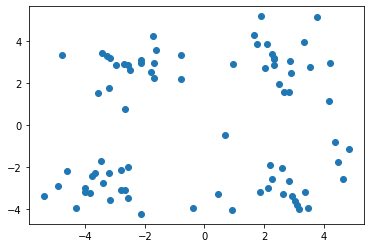

In [54]:
import pandas as pd
def loadDataSet(fileName):
    """
    函数说明:加载数据集
    parameters:
        fileName - 文件名  
    return：
        DataMat - 数据集
    """
    data = pd.read_table("./KmeansData.txt", sep="\t", header=None)
    data = np.array(data)
    return data
DataMat = loadDataSet("./KmeansData.txt")
plt.scatter(DataMat[:, 0], DataMat[:, 1])

In [5]:
def distEclud(vecA, vecB):
    """
    函数说明:利用欧式距离来计算每个样本点之间的距离
    parameters:
        vecA - A样本的特征向量（本数据中指它的二维坐标值）
        vecB - B样本的特征向量（本数据中指它的二维坐标值）  
    return：
        Dist - 样本点间的欧式距离
    """ 
    dist = np.sqrt(np.sum(vecA - vecB)**2)
    return  dist

In [76]:
import numpy as np
def randCent(DataMat, k):
    """
    函数说明:从当前样本点中随机选取k个初始簇中心
    parameters:
         DataMat - 数据集
         k - 聚类后簇的数量
    return：
        centroids - 簇中心列表
    """    
    num_examples = DataMat.shape[0]
    random_index = np.random.permutation(num_examples)
    centroids = DataMat[random_index[:k], :]
    return centroids
init_centroid = randCent(DataMat, 3)
print(init_centroid)

[[-3.487105 -1.724432]
 [-4.786473  3.358547]
 [-3.156485  3.191137]]


In [61]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    """
    函数说明：K-均值算法
    parameters:
         dataSet -数据集
         k -簇个数
         distMeas -距离计算函数
         createCent -创建初始质心函数
    return：
         centroids -质心列表
         clusterAssment -簇分配结果矩阵
    """   
    centroids = createCent(dataSet, k)
    num_samples = dataSet.shape[0]
    num_features = dataSet.shape[1]
    max_iterations = 200
    
    for _ in range(max_iterations):
        # 这一步很关键，要得到的是索引，也就是哪个点最近，而不想得到距离的值
        closest_dist_id = np.zeros((num_samples, 1))
        for sample_id in range(num_samples):
            distance_to_centroid = np.zeros((k, 1))
            for centroid_id in range(k):
                distance_to_centroid[centroid_id] = distEclud(dataSet[sample_id], centroids[centroid_id])
            # 注意，这里得到的是索引，所以要argmin!!!!!!不是min!!!!!!
            closest_dist_id[sample_id] = np.argmin(distance_to_centroid)
        
        clusterAssment = closest_dist_id
        # 更新中心点
        for centroid_id in range(k):
            closest_id = centroid_id == closest_dist_id
#             print("Before update :", centroids[centroid_id])
#             print("Updated       :", np.mean(dataSet[closest_id.flatten()], axis=0))
            centroids[centroid_id] = np.mean(dataSet[closest_id.flatten()], axis=0)
#         print("Results :\n", centroids)

    return centroids, clusterAssment



In [55]:
def drawDataSet(DataMat,centroids,clusterAssment,k):
    """
    函数说明：将聚类结果可视化
    parameters：
         centList -质心列表
         clusterAssment -簇列表
         dataMat -数据集
         k -簇个数
    return:
         A picture
"""
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x')

    points_0 = DataMat[(clusterAssment == 0).flatten()]
    points_1 = DataMat[(clusterAssment == 1).flatten()]
    points_2 = DataMat[(clusterAssment == 2).flatten()]
    points_3 = DataMat[(clusterAssment == 3).flatten()]
    plt.scatter(points_0[:, 0], points_0[:, 1])
    plt.scatter(points_1[:, 0], points_1[:, 1])
    plt.scatter(points_2[:, 0], points_2[:, 1])
    plt.scatter(points_3[:, 0], points_3[:, 1])
    plt.show()

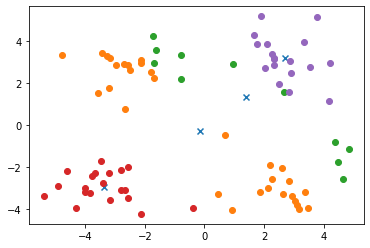

In [68]:
if __name__ =='__main__':
    """
    按照Kmeans原理来调用上述函数
    """
    centroids, clusterAssment = kMeans(DataMat, 4, distEclud, randCent)
    drawDataSet(DataMat, centroids, clusterAssment, 4)